# **Exploratory Data Analysis (EDA) - Customer Personality Analysis**

Project 2 Data Science Machine Learning Purwadhika

Yason Dawson

# **Descriptions**

**Latar Belakang**

Customer Personality Analysis atau Analisis Kepribadian Pelanggan adalah analisis tentang pelanggan yang ideal bagi perusahaan. Ini dapat membantu bisnis untuk lebih memahami pelanggannya dan memudahkan mereka untuk memodifikasi produk sesuai dengan kebutuhan, perilaku, dan perhatian khusus dari berbagai jenis pelanggan.

Analisis kepribadian pelanggan membantu bisnis untuk memodifikasi produknya berdasarkan target pelanggan dari berbagai jenis segmen pelanggan. Misalnya, alih-alih mengeluarkan uang untuk memasarkan produk baru ke setiap pelanggan di database perusahaan, perusahaan dapat menganalisis segmen pelanggan mana yang paling mungkin membeli produk dan kemudian memasarkan produk hanya pada segmen tertentu.

**Rumusan Masalah**

Bagian terpenting dari analisis kepribadian pelanggan adalah mendapatkan jawaban atas pertanyaan-pertanyaan seperti:

1. Apa yang pelanggan katakan tentang produk tersebut: apa yang memberikan sikap pelanggan terhadap produk?
2. Apa yang dilakukan orang: yang mengungkapkan apa yang dilakukan orang daripada apa yang mereka katakan tentang produk Anda?

# **Importing Libraries and Dataset**

**Package Imports**

In [28]:
import numpy as np
import pandas as pd
import datetime
from datetime import date
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')

**Load Dataset**

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
data= pd.read_csv('/content/drive/MyDrive/Yason_Dataset/Purwadhika/marketing_campaign.csv',  sep='\t')
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [31]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

# **Data Understanding**

**People**


* ID: Identitas unik Customer
* Year_Birth: Tahun Lahir Customer
* Education: Tingkat pendidikan Customer
* Marital_Status: Status pernikahan customer
* Income: Pendapatan rumah tangga tahunan customer
* Kidhome: Jumlah anak dalam rumah tangga customer
* Teenhome: Jumlah remaja dalam rumah tangga customer
* Dt_Customer: Tanggal pelanggan berlangganan dengan perusahaan
* Recency: Jumlah hari sejak pembelian terakhir customer
* Complain: 1 jika customer mengeluh dalam 2 tahun terakhir, 0 sebaliknya



**Products**

* MntWines: Jumlah uang yang dihabiskan untuk anggur dalam 2 tahun terakhir
* MntFruits: Jumlah uang yang dihabiskan untuk buah dalam 2 tahun terakhir
* MntMeatProducts: Jumlah uang yang dihabiskan untuk daging dalam 2 tahun terakhir
* MntFishProducts: Jumlah uang yang dihabiskan untuk ikan dalam 2 tahun terakhir
* MntSweetProducts: Jumlah uang yang dihabiskan untuk permen dalam 2 tahun terakhir
* MntGoldProds: Jumlah uang yang dihabiskan untuk emas dalam 2 tahun terakhir

**Promotion**

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 jika customer menerima penawaran pada promosi ke-1, 0 sebaliknya
* AcceptedCmp2: 1 jika customer menerima penawaran pada promosi ke-2, 0 sebaliknya
* AcceptedCmp3: 1 jika customer menerima penawaran pada promosi ke-3, 0 sebaliknya
* AcceptedCmp4: 1 jika customer menerima penawaran pada promosi ke-4, 0 sebaliknya
* AcceptedCmp5: 1 jika customer menerima penawaran pada promosi ke-5, 0 sebaliknya
* Response: 1 jika pelanggan menerima penawaran pada promosi terakhir, 0 sebaliknya

**Place**

* NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan
* NumCatalogPurchases:Jumlah pembelian yang dilakukan melalui katalog
* NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko
* NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir

# **Data Preprocessing**

## **Data Tranformasi**

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



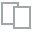
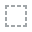
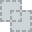
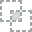
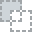
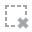
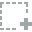
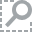
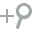
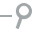
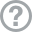
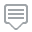
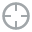
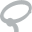
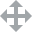
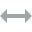
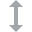
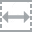
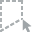
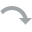
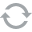
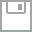
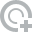
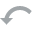
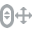
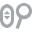
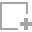
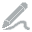
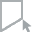
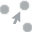
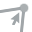
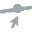

In [32]:
!pip install dataprep
from dataprep.eda import plot, plot_correlation, create_report, plot_missing
plot(data)

#source 
#https://docs.dataprep.ai/user_guide/eda/insights.html
#https://dataprep.ai/

#Cara menyimpan report
#report.save(filename='report_01', to='~/Desktop')

**Dealing with Missing Values**

In [33]:
data.loc[(data['Income'].isnull() == True), 'Income'] = data['Income'].mean()   

In [34]:
data.isnull().sum().sort_values(ascending=False).head()  

ID                   0
NumDealsPurchases    0
Z_Revenue            0
Z_CostContact        0
Complain             0
dtype: int64

**Adding New Variables**

In [35]:
#Umur Pelanggan dihitung pertahun 2021
data['Age'] = 2021-data['Year_Birth']

In [36]:
#Loyal Pelanggan
last_day = date(2014,10, 4)
data['Loyal_Cst']=pd.to_datetime(data['Dt_Customer'], dayfirst=True,format = '%d-%m-%Y')
data['Loyal_Cst'] = pd.to_numeric(data['Loyal_Cst'].dt.date.apply(lambda x: (last_day - x)).dt.days, downcast='integer')/30

In [37]:
#Total Anak di Rumah
data["Children"]= data["Kidhome"]+data["Teenhome"]
data['Has_child'] = np.where(data.Children> 0, 'Has child', 'No child')
data['Children'].replace({3: "3 children",2:'2 children',1:'1 child',0:"No child"},inplace=True)

In [38]:
#Rename Data Education
education= {"Basic": "Undergraduate", "2n Cycle": "Undergraduate", 
      "Graduation": "Postgraduate", "Master": "Postgraduate", "PhD": "Postgraduate"}
data["Education"]= data["Education"].replace(education)

In [39]:
#Recategorize dari Status Pernikahan
data['Marital_Status']=data['Marital_Status'].replace(
    {'Divorced':'Alone','Single':'Alone',
     'Married':'In couple','Together':'In couple',
     'Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})

In [40]:
# Total Biaya Belanja dari Pelanggan
data["Spending"]= data["MntWines"]+data["MntFruits"]+data["MntFishProducts"]+data["MntMeatProducts"]+data["MntSweetProducts"]+data["MntGoldProds"]

In [41]:
#Rename beberapa kolom
data=data.rename(columns={'NumWebPurchases': "Web",'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'})
data=data.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

In [42]:
data=data[['Age','Education','Marital_Status','Income','Spending','Loyal_Cst','Has_child','Children','Wines','Fruits','Meat','Fish','Sweets','Gold']]
data.head()

Age     Education Marital_Status   Income  Spending  Loyal_Cst  Has_child  \
0   64  Postgraduate          Alone  58138.0      1617  25.333333   No child   
1   67  Postgraduate          Alone  46344.0        27   7.000000  Has child   
2   56  Postgraduate      In couple  71613.0       776  13.633333   No child   
3   37  Postgraduate      In couple  26646.0        53   7.866667  Has child   
4   40  Postgraduate      In couple  58293.0       422   8.600000  Has child   

     Children  Wines  Fruits  Meat  Fish  Sweets  Gold  
0    No child    635      88   546   172      88    88  
1  2 children     11       1     6     2       1     6  
2    No child    426      49   127   111      21    42  
3     1 child     11       4    20    10       3     5  
4     1 child    173      43   118    46      27    15

DataPrep Report
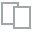
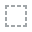
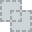
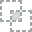
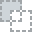
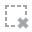
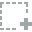
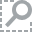
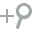
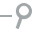
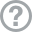
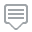
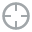
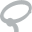
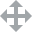
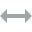
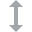
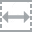
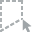
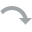
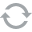
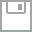
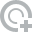
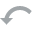
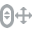
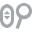
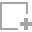
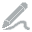
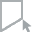
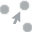
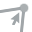
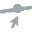

In [43]:
from dataprep.eda import plot, plot_correlation, create_report, plot_missing
create_report(data)

## **Outliers**

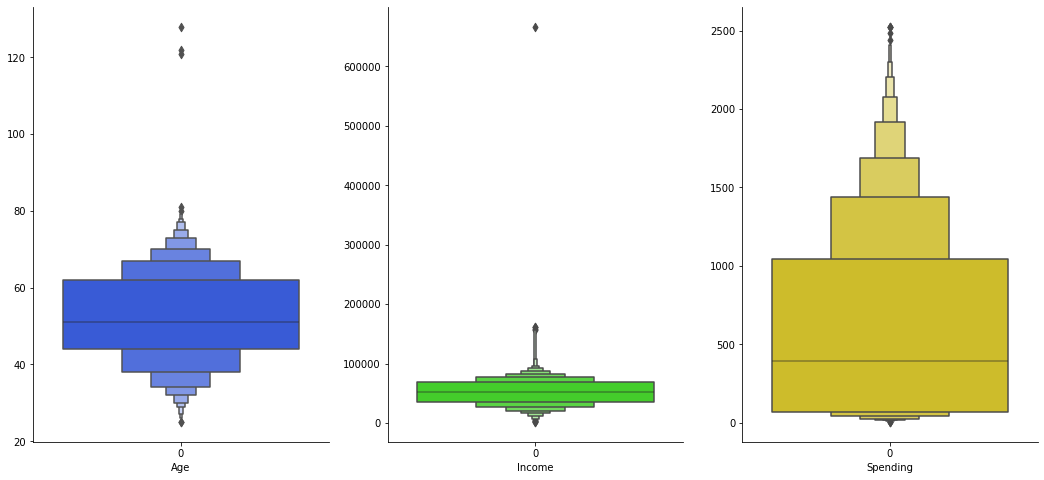

In [44]:
sns.set_palette(sns.color_palette("RdPu", 6))
palette = ["#1f4cf0","#31e810","#e8d210","#10e8d2","#e84d10"]

features= ["Age", "Income", "Spending"]

fig, axs = plt.subplots(ncols=len(features),figsize=(6*len(features),8))
for i in range(len(features)):
  sns.boxenplot(data=data[features[i]],
                showfliers=True,
                ax=axs[i],
                palette=[palette[i]]
                ).set(xlabel=features[i])
  sns.despine()

In [45]:
print("Total Pelanggan Berumur diatas 100= ", len(data[data["Age"]>100]))
print("Total Pelanggan dengan Income diatas 200,000= ", len(data[data["Income"]>200000]))

Total Pelanggan Berumur diatas 100=  3
Total Pelanggan dengan Income diatas 200,000=  1


In [46]:
data= data.drop(data[(data["Age"]>100) | (data["Income"]>200000)].index)
print("Total Data= ",len(data))

Total Data=  2236


In [47]:
data=data.dropna(subset=['Income'])
data=data[data['Income']<600000]

# **Clustering**

In [48]:
scaler=StandardScaler()
dataset_temp=data[['Income','Loyal_Cst','Spending']]
X_std=scaler.fit_transform(dataset_temp)
X = normalize(X_std,norm='l2')

In [49]:
gmm=GaussianMixture(n_components=4, covariance_type='spherical',max_iter=2000, random_state=5).fit(X)
labels = gmm.predict(X)
dataset_temp['Cluster'] = labels
dataset_temp=dataset_temp.replace({0:'Stars',1:'Need attention',2:'High potential',3:'Leaky bucket'})
data = data.merge(dataset_temp.Cluster, left_index=True, right_index=True)

In [50]:
pd.options.display.float_format = "{:.0f}".format
summary=data[['Income','Spending','Loyal_Cst','Cluster']]
summary.set_index("Cluster", inplace = True)
summary=summary.groupby('Cluster').describe().transpose()
summary.head()

Cluster       High potential  Leaky bucket  Need attention  Stars
Income count             603           464             639    530
       mean            34996         73303           37989  69427
       std             12213         13822           12405  12053
       min              2447         49090            1730  44802
       25%             26490         65206           29306  60695

# **Data Vis**

Let's go to https://public.tableau.com/app/profile/yason.dawson4391/viz/CustomerPersonalityAnalysis_16654122194520/Dashboard1

# **Algortima Apriori**

In [51]:
cut_labels_Age = ['Young', 'Adult', 'Mature', 'Senior']
cut_bins = [0, 30, 45, 65, 120]
data['Age_group'] = pd.cut(data['Age'], bins=cut_bins, labels=cut_labels_Age)

cut_labels_Income = ['Low income', 'Low to medium income', 'Medium to high income', 'High income']
data['Income_group'] = pd.qcut(data['Income'], q=4, labels=cut_labels_Income)

cut_labels_Seniority = ['New customers', 'Discovering customers', 'Experienced customers', 'Old customers']
data['Seniority_group'] = pd.qcut(data['Loyal_Cst'], q=4, labels=cut_labels_Seniority)
data=data.drop(columns=['Age','Income','Loyal_Cst'])

In [52]:
cut_labels = ['Low consumer', 'Frequent consumer', 'Biggest consumer']
data['Wines_segment'] = pd.qcut(data['Wines'][data['Wines']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data['Fruits_segment'] = pd.qcut(data['Fruits'][data['Fruits']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data['Meat_segment'] = pd.qcut(data['Meat'][data['Meat']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data['Fish_segment'] = pd.qcut(data['Fish'][data['Fish']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data['Sweets_segment'] = pd.qcut(data['Sweets'][data['Sweets']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data['Gold_segment'] = pd.qcut(data['Gold'][data['Gold']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
data.replace(np.nan, "Non consumer",inplace=True)
data.drop(columns=['Spending','Wines','Fruits','Meat','Fish','Sweets','Gold'],inplace=True)
data = data.astype(object)

In [53]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 999)
pd.options.display.float_format = "{:.3f}".format
association=data.copy() 
df = pd.get_dummies(association)
min_support = 0.08
max_len = 10
frequent_items = apriori(df, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

product='Wines'
segment='Biggest consumer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnal_care.head()

antecedents  \
9469  (Education_Postgraduate, Cluster_Stars, Income_group_High income)   
4905                          (Cluster_Stars, Income_group_High income)   
9454          (Age_group_Mature, Education_Postgraduate, Cluster_Stars)   
4917                     (Cluster_Stars, Seniority_group_Old customers)   
4898                                  (Age_group_Mature, Cluster_Stars)   

                           consequents  antecedent support  \
9469  (Wines_segment_Biggest consumer)               0.111   
4905  (Wines_segment_Biggest consumer)               0.121   
9454  (Wines_segment_Biggest consumer)               0.119   
4917  (Wines_segment_Biggest consumer)               0.122   
4898  (Wines_segment_Biggest consumer)               0.129   

      consequent support  support  confidence  lift  leverage  conviction  
9469               0.248    0.080       0.719 2.896     0.052       2.674  
4905               0.248    0.085       0.701 2.825     0.055       2.515  
9454               0.248    0.083       0.697 2.807     0.054       2.478  
4917               0.248    0.085       0.692 2.789     0.054       2.443  
4898               0.248    0.089       0.691 2.784     0.057       2.433

In [54]:
data.to_csv('data_clean.csv', header=False, index=False)

In [55]:
data.to_excel('data_clean.xlsx', header=False, index=False)

# **Kesimpulan**

1. Terdapat 88,53% pelanggan yang memiliki pendidikan melalui Perguruan Tinggi;
2. Kemudian, terdapat 64,51% Pelanggan yang memiliki pasangan dengan rata 84% adult dan mature dan 12% adalah young adult;
3. Data Pelanggan menunjukkan bahwa 29% tidak memiliki anak, 50% memiliki 1 anak, 19,38% memiliki 2 anak, dan sisanya memiliki 3 anak;
4. Berdasarkan metode clustering, pelanggan yang tidak memiliki anak dan memiliki 1 anak tersebut berpotensi kontribusi paling besar pada segments stars dan juga high potensial;
5. Anggur menyumbang sebagian besar penjualan unit di seluruh segmen, daging memberikan kontribusi penjualan unit yang signifikan di seluruh segmen, dan gold menjadi populer dalam segmen Need attention & Leaky Bucket;

# **Saran**

1. Klustering dari data tersebut lebih dispesifikasikan kembali, seperti cluster 1, 2, 3, dst yang berdasar pada data tersebut seperti umur, income, marital status, jumlah anak, level spending, education, rata-rata deal pembelian, dan offer responds;
2. Disarankan untuk melalukan beberapa metode selain apriori sebagai pembanding tingkat akurasi dari data tersebut.